In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin

import time,sys,os,itertools,cv2,keras,math,random,zipfile,collections
from tempfile import gettempdir
from collections import *
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import pandas as pd
import sys, time, os, itertools
from collections import *
import numpy as np
if os.name != 'posix':
    os.chdir(r'M:\Course stuff\ASPRI\Practice')
#os.chdir("M:\Course stuff\ASPRI\Practice")

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.listdir()

['.ipynb_checkpoints',
 'initial_data',
 'initial_data.zip',
 'initial_data.zipfinal_embeddings.txt',
 'initial_data.zip_AdamOptimizer.png',
 'initial_data_2.zip',
 'initial_data_2.zipfinal_embeddings_2.txt',
 'initial_data_2.zip_AdamOptimizer.png',
 'preprocessing.ipynb',
 'preprocess_gcp.py',
 'route-collector.akl.pch.net-ipv4_bgp_routes.2017.12.28',
 'second_data.zip',
 'tex9',
 'tex9.zip',
 'tex9.zip_AdamOptimizer.png',
 'text8.zip',
 'tsne-stage1_data.png',
 'tsne-stage1_data2.png',
 'tsne_pch.png',
 'tsne_pch_bigger.png',
 'tsne_tutorial.png',
 'word2vec_advanced.py',
 'word2vec_basic.py']

In [3]:
f = open("initial_data")
lines = f.readlines()

In [20]:
len(lines),len(lines[1:-2])

(1058276, 1058273)

In [21]:
lines = lines[1:-2]

In [23]:
lines = [i.strip() for i in lines]

In [67]:
def classify(strx):
    #call this on each line
    next_hop = 0
    prefix = ""
    #path = ""
    path = []
    for i in strx.split(' '):
        slash_counter,dot_counter = i.count('/'),i.count('.')
        #print(i.count('.'),i.count('/'))
        if dot_counter == 3 and slash_counter == 1:
            prefix = i
        elif dot_counter == 3 and slash_counter == 0:
            next_hop = i
        elif len(i) > 1 and dot_counter == 0 and slash_counter == 0:
            
            #path = path.join(i)
            path.append(i)
            #print("Sanity check on paths",path,"\t",i)
            #path = path.join(' ')
    path_ = path
    path = " ".join([str(i) for i in path_])
    protocol = strx[-1]
    #print(protocol)
    #print("prefix = {0}, next hop = {1}, path = {2}".format(prefix,next_hop,path))
    return(prefix,next_hop,path,protocol)

In [68]:
lines[0]

'0  1.0.128.0/17 80.249.208.85 3257 38040 9737 i'

In [69]:
temp = (classify(lines[0]))
prefix,next_hop,path,protocol = temp[0],temp[1],temp[2],temp[3]
print(prefix,next_hop,path,protocol)

1.0.128.0/17 80.249.208.85 3257 38040 9737 i


In [84]:
for i in range(5,8):
    current_return = classify(lines[i])
    prefix,next_hop,path,protocol = current_return[0],current_return[1],current_return[2],current_return[3]
    if not prefix:
        prefix = current_prefix
    else:
        current_prefix = prefix
    print("line:{0}  \nprefix: {1},next_hop: {2}, path = {3}, \
    protocol: {4}".format(lines[i],current_prefix,next_hop,path,protocol))
    print("\n\n")

line:1       80.249.209.37 3491 38040 9737 i  
prefix: 1.0.128.0/19,next_hop: 80.249.209.37, path = 3491 38040 9737,     protocol: i



line:0       80.249.211.42 6762 38040 9737 i  
prefix: 1.0.128.0/19,next_hop: 80.249.211.42, path = 6762 38040 9737,     protocol: i



line:0  1.0.128.0/19 80.249.208.85 3257 38040 9737 i  
prefix: 1.0.128.0/19,next_hop: 80.249.208.85, path = 3257 38040 9737,     protocol: i





In [85]:
def drawProgressBar(percent, barLen = 50):
	sys.stdout.write("\r")
	progress = ""
	for i in range(barLen):
		if i<int(barLen * percent):
			progress += "="
		else:
			progress += " "
	sys.stdout.write("[ %s ] %.2f%%" % (progress, percent * 100))
	sys.stdout.flush()

In [94]:
n_f_h = open("preprocessed_data.txt",'w')
n_f_h_ = open("preprocessed_data_without_protocol.txt",'w')
counter = 0
total = len(lines)
for line in lines:
    prefix,next_hop,path,protocol = classify(line)
    if not prefix:
        prefix = current_prefix
    else:
        current_prefix = prefix
    n_f_h.write(str(current_prefix)+"\t"+str(next_hop)+"\t"+str(path)+"\t"+str(protocol)+"\n")
    n_f_h_.write(str(current_prefix)+"\t"+str(next_hop)+"\t"+str(path)+"\n")
    counter += 1
    drawProgressBar(counter/total)
n_f_h.close()
n_f_h_.close()

[                                                    ] 1.13%

KeyboardInterrupt: 

In [95]:
#writing the files from powershell to overcome I/O buffers over jupyter

In [116]:
data = pd.read_csv("preprocessed_data.txt",sep = "\t",header = None, error_bad_lines = False, low_memory = False)
data.columns = ['Prefix','Next Hop','Path','Protocol']

In [117]:
data.head()

,Prefix,Next Hop,Path,Protocol
0,1.0.128.0/17,80.249.208.85,3257 38040 9737,i
1,1.0.128.0/17,80.249.209.150,6939 4766 38040 9737,i
2,1.0.128.0/17,80.249.209.37,3491 38040 9737,i
3,1.0.128.0/17,80.249.211.42,6762 38040 9737,i
4,1.0.128.0/18,80.249.208.85,3257 38040 9737,i


In [118]:
data['Anomaly'] = pd.Series(np.zeros(len(data),dtype = np.int8),index = data.index)

In [119]:
data.head()

,Prefix,Next Hop,Path,Protocol,Anomaly
0,1.0.128.0/17,80.249.208.85,3257 38040 9737,i,0
1,1.0.128.0/17,80.249.209.150,6939 4766 38040 9737,i,0
2,1.0.128.0/17,80.249.209.37,3491 38040 9737,i,0
3,1.0.128.0/17,80.249.211.42,6762 38040 9737,i,0
4,1.0.128.0/18,80.249.208.85,3257 38040 9737,i,0


In [120]:
data_next_hop = data['Next Hop'].copy()

In [121]:
from sklearn.utils import shuffle
data_next_hop_shuffled = shuffle(data_next_hop, random_state = 10) #trying to preserve random state

In [122]:
data_prefix_shuffled = shuffle(data['Prefix'].copy(),random_state = 11) # making sure a different random state is used
data_path_shuffled = shuffle(data['Path'].copy(),random_state = 12)
data_protocol_shuffled = shuffle(data['Protocol'].copy(), random_state = 2)

In [128]:
data_shuffled = pd.DataFrame({'Prefix': data_prefix_shuffled,
                              'Next Hop': data_next_hop_shuffled,
                              'Path': data_path_shuffled,
                              'Protocol': data_protocol_shuffled,
                              'Anomaly':np.ones(len(data),dtype = np.int8)
                             })

In [132]:
from sklearn.model_selection import train_test_split
misconfigured_train, misconfigured_test = train_test_split(data_shuffled,
                                                           train_size = 0.4,shuffle = True) #getting 40% of misconf data for train

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [139]:
misconfigured_train.shape, misconfigured_test.shape

((423309, 5), (634964, 5))

In [140]:
original_train,original_test = train_test_split(data, train_size = 0.8) #splitting 80% original data for training with shuffle ON

combined_train = pd.concat([misconfigured_train,original_train],ignore_index = True)
combined_test = pd.concat([misconfigured_test,original_test],ignore_index = True)
combined_train.shape,combined_test.shape

c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((1269927, 5), (846619, 5))

In [142]:
combined_train.columns

Index(['Anomaly', 'Next Hop', 'Path', 'Prefix', 'Protocol'], dtype='object')

In [149]:
x_train,y_train = combined_train[['Next Hop', 'Path', 'Prefix']],combined_train[['Anomaly']] #train on x_train 
                                          #with y_train for loss
x_test,y_test = combined_test[['Next Hop', 'Path', 'Prefix']], combined_test[['Anomaly']]
print("x train shape: {0} \
\ntrain_labels: {1} \
\nx test shape: {2} \
\ntest_labels: {3} \
\ncombined_train: {4}\
\ncombined test:{5}".format(x_train.shape,y_train.shape,x_test.shape,y_test.shape,combined_train.shape,combined_test.shape))

x train shape: (1269927, 3) 
train_labels: (1269927, 1) 
x test shape: (846619, 3) 
test_labels: (846619, 1) 
combined_train: (1269927, 5)
combined test:(846619, 5)


In [150]:
#lets try logistic regression on the raw data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'l2',verbose = 1, n_jobs = -1)
logreg.fit(x_train,y_train)
#predict(x_test)
score(x_test,y_test)

ValueError: could not convert string to float: '162.57.244.0/24'

In [138]:
del combined

In [6]:
def maybe_download(filename, expected_bytes):
	"""Download a file if not present, and make sure it's the right size."""
	local_filename = os.path.join(os.getcwd(), filename)
	if not os.path.exists(local_filename):
		local_filename, _ = urllib.request.urlretrieve(url + filename,local_filename)

	return local_filename

In [7]:
filename = maybe_download('initial_data_2.zip',4058291)

In [8]:
def read_data(filename):
	"""Extract the first file enclosed in a zip file as a list of words."""
	with zipfile.ZipFile(filename) as f:
		data = tf.compat.as_str(f.read(f.namelist()[0])).split()
	return data

In [9]:
vocabulary = read_data(filename)
print('Data size', len(vocabulary))

# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 50000

Data size 7509822


In [13]:
def build_dataset(words, n_words):
	"""Process raw inputs into a dataset."""
	count = [['UNK', -1]]
	count.extend(Counter(words).most_common(n_words - 1))
	dictionary = dict()
	for word, _ in count:
		dictionary[word] = len(dictionary)
	data = list()
	unk_count = 0
	for word in words:
		index = dictionary.get(word, 0)
		if index == 0:  # dictionary['UNK']
			unk_count += 1
		data.append(index)
	count[0][1] = unk_count
	reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
	return data, count, dictionary, reversed_dictionary

In [14]:
# Filling 4 global variables:
# data - list of codes (integers from 0 to vocabulary_size-1).
#   This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# dictionary - map of words(strings) to their codes(integers)
# reverse_dictionary - maps codes(integers) to words(strings)
data, count, dictionary, reverse_dictionary = build_dataset(vocabulary,vocabulary_size)
del vocabulary  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

Most common words (+UNK) [['UNK', 371223], ('i', 958459), ('0', 677509), ('1', 380051), ('3257', 184889)]
Sample data [37217, 37218, 37219, 37220, 37221, 2, 27231, 5, 4, 234] ['Valid', 'Network', 'Next-Hop', 'Path', 'Protocol', '0', '1.0.128.0/17', '80.249.208.85', '3257', '38040']


In [25]:
data_index = 1

In [26]:
def generate_batch(batch_size, num_skips, skip_window):
	global data_index
	assert batch_size % num_skips == 0
	assert num_skips <= 2 * skip_window
	batch = np.ndarray(shape=(batch_size), dtype=np.int32)
	labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
	span = 2 * skip_window + 1  # [ skip_window target skip_window ]
	buffer = collections.deque(maxlen=span)
	if data_index + span > len(data):
		data_index = 0
	buffer.extend(data[data_index:data_index + span])
	data_index += span
	for i in range(batch_size // num_skips):
		context_words = [w for w in range(span) if w != skip_window]
		words_to_use = random.sample(context_words, num_skips)
		for j, context_word in enumerate(words_to_use):
			batch[i * num_skips + j] = buffer[skip_window]
			labels[i * num_skips + j, 0] = buffer[context_word]
		if data_index == len(data):
			buffer[:] = data[:span]
			data_index = span
		else:
			buffer.append(data[data_index])
			data_index += 1
	# Backtrack a little bit to avoid skipping words in the end of a batch
	data_index = (data_index + len(data) - span) % len(data)
	return batch, labels

In [27]:
batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
	print(batch[i], reverse_dictionary[batch[i]],
				'->', labels[i, 0], reverse_dictionary[labels[i, 0]])

37219 Next-Hop -> 37218 Network
37219 Next-Hop -> 37220 Path
37220 Path -> 37219 Next-Hop
37220 Path -> 37221 Protocol
37221 Protocol -> 37220 Path
37221 Protocol -> 2 0
2 0 -> 37221 Protocol
2 0 -> 27231 1.0.128.0/17


In [48]:
# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.
num_sampled = 64      # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

In [29]:
graph = tf.Graph()

with graph.as_default():

	# Input data.
	train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
	train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
	valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

	# Ops and variables pinned to the CPU because of missing GPU implementation
	with tf.device('/gpu:0'):
		# Look up embeddings for inputs.
		embeddings = tf.Variable(
				tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
		embed = tf.nn.embedding_lookup(embeddings, train_inputs)

		# Construct the variables for the NCE loss
		nce_weights = tf.Variable(
				tf.truncated_normal([vocabulary_size, embedding_size],
														stddev=1.0 / math.sqrt(embedding_size)))
		nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

	# Compute the average NCE loss for the batch.
	# tf.nce_loss automatically draws a new sample of the negative labels each
	# time we evaluate the loss.
	# Explanation of the meaning of NCE loss:
	#   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
	loss = tf.reduce_mean(
			tf.nn.nce_loss(weights=nce_weights,
										 biases=nce_biases,
										 labels=train_labels,
										 inputs=embed,
										 num_sampled=num_sampled,
										 num_classes=vocabulary_size))

	# Construct the SGD optimizer using a learning rate of 1.0.
	#optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

	# What if we use AdamOptimizer
	optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

	# Compute the cosine similarity between minibatch examples and all embeddings.
	norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
	normalized_embeddings = embeddings / norm
	valid_embeddings = tf.nn.embedding_lookup(
			normalized_embeddings, valid_dataset)
	similarity = tf.matmul(
			valid_embeddings, normalized_embeddings, transpose_b=True)

	# Add variable initializer.
	init = tf.global_variables_initializer()

# Step 5: Begin training.
num_steps = 1000#01

In [49]:
num_steps = 100#00
with tf.Session(graph=graph) as session:
	# We must initialize all variables before we use them.
	init.run()
	print('Initialized')

	average_loss = 0
	for step in xrange(num_steps):
		batch_inputs, batch_labels = generate_batch(
				batch_size, num_skips, skip_window)
		feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

		# We perform one update step by evaluating the optimizer op (including it
		# in the list of returned values for session.run()
		_, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
		average_loss += loss_val

		if step % 200 == 0:
			if step > 0:
				average_loss /= 200
			# The average loss is an estimate of the loss over the last 2000 batches.
			print('Average loss at step ', step, ': ', average_loss)
			average_loss = 0
	final_embeddings = normalized_embeddings.eval()

#		# Note that this is expensive (~20% slowdown if computed every 500 steps)
#		if step % 500 == 0:#10000 == 0:
#			sim = similarity.eval()
#			for i in xrange(valid_size):
#				valid_word = reverse_dictionary[valid_examples[i]]
#				top_k = 8  # number of nearest neighbors
#				nearest = (-sim[i, :]).argsort()[1:top_k + 1]
#				log_str = 'Nearest to %s:' % valid_word
#				for k in xrange(top_k):
#					close_word = reverse_dictionary[nearest[k]]
#					log_str = '%s %s,' % (log_str, close_word)
#				print(log_str)

Initialized
Average loss at step  0 :  269.59375


In [36]:
final_embeddings.shape

(50000, 256)

In [23]:
final_embeddings

array([[ 0.01415919, -0.08971849, -0.12974453, ...,  0.13426025,
         0.00275487, -0.01166902],
       [-0.11286316,  0.13595837, -0.09762188, ..., -0.10381407,
         0.12273677,  0.08019534],
       [-0.10589023, -0.04612185,  0.05859065, ..., -0.0210766 ,
        -0.05916021,  0.12943628],
       ..., 
       [-0.03992559, -0.11000042,  0.1416038 , ..., -0.07273487,
         0.10159183,  0.03167187],
       [-0.00820939,  0.00447227, -0.11816735, ...,  0.02876471,
        -0.01581109,  0.04703647],
       [ 0.13610129,  0.14040588, -0.14806201, ...,  0.09896136,
        -0.06366452, -0.07661925]], dtype=float32)

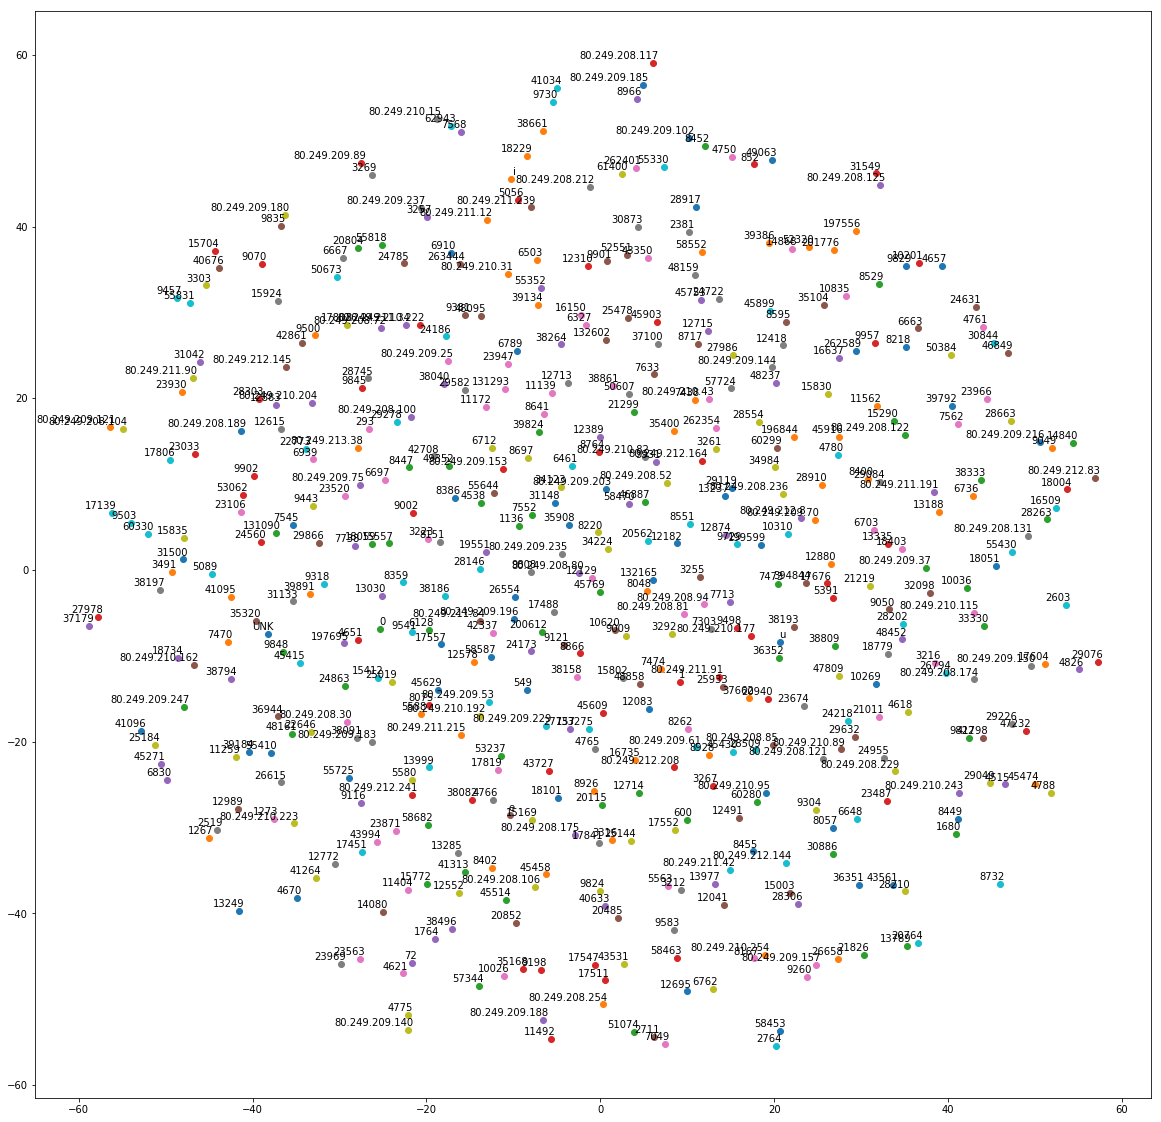

In [24]:
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, filename):
	assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
	plt.figure(figsize=(20,20))  # in inches
	for i, label in enumerate(labels):
		x, y = low_dim_embs[i, :]
		plt.scatter(x, y)
		plt.annotate(label,
								 xy=(x, y),
								 xytext=(5, 2),
								 textcoords='offset points',
								 ha='right',
								 va='bottom')

	plt.show()
	#plt.savefig(filename)

try:
	# pylint: disable=g-import-not-at-top
	from sklearn.manifold import TSNE
	import matplotlib.pyplot as plt

	tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
	plot_only = 500
	low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
	labels = [reverse_dictionary[i] for i in xrange(plot_only)]
	plot_with_labels(low_dim_embs, labels, os.path.join(os.getcwd(), str(filename+"_AdamOptimizer.png")))

except ImportError as ex:
	print('Please install sklearn, matplotlib, and scipy to show embeddings.')
	print(ex)

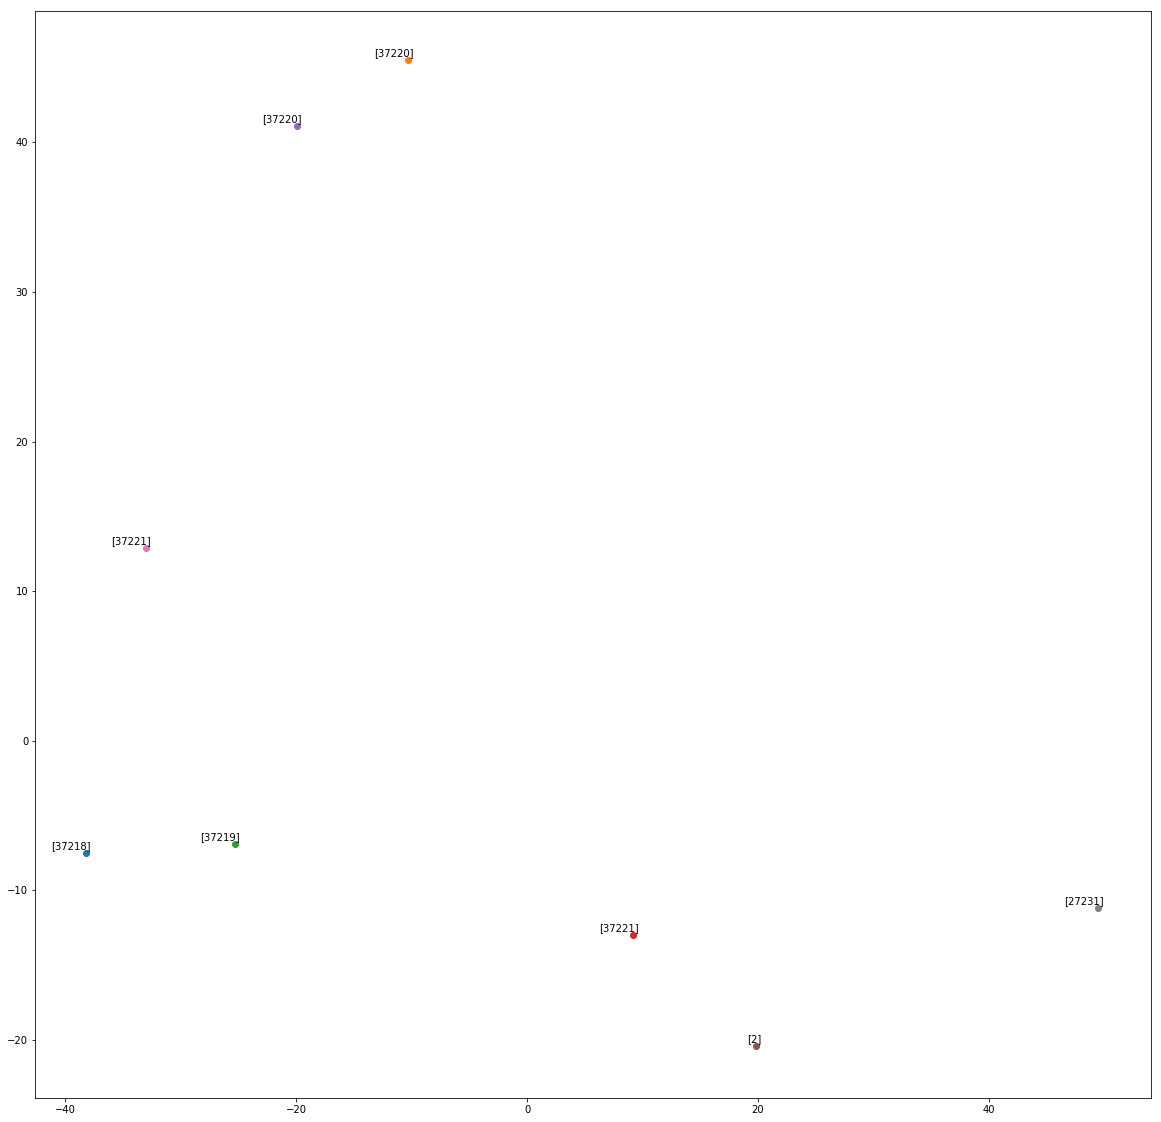

In [44]:
#100 steps
plot_with_labels(low_dim_embs, labels, os.path.join(os.getcwd(), str(filename+"_AdamOptimizer.png")))

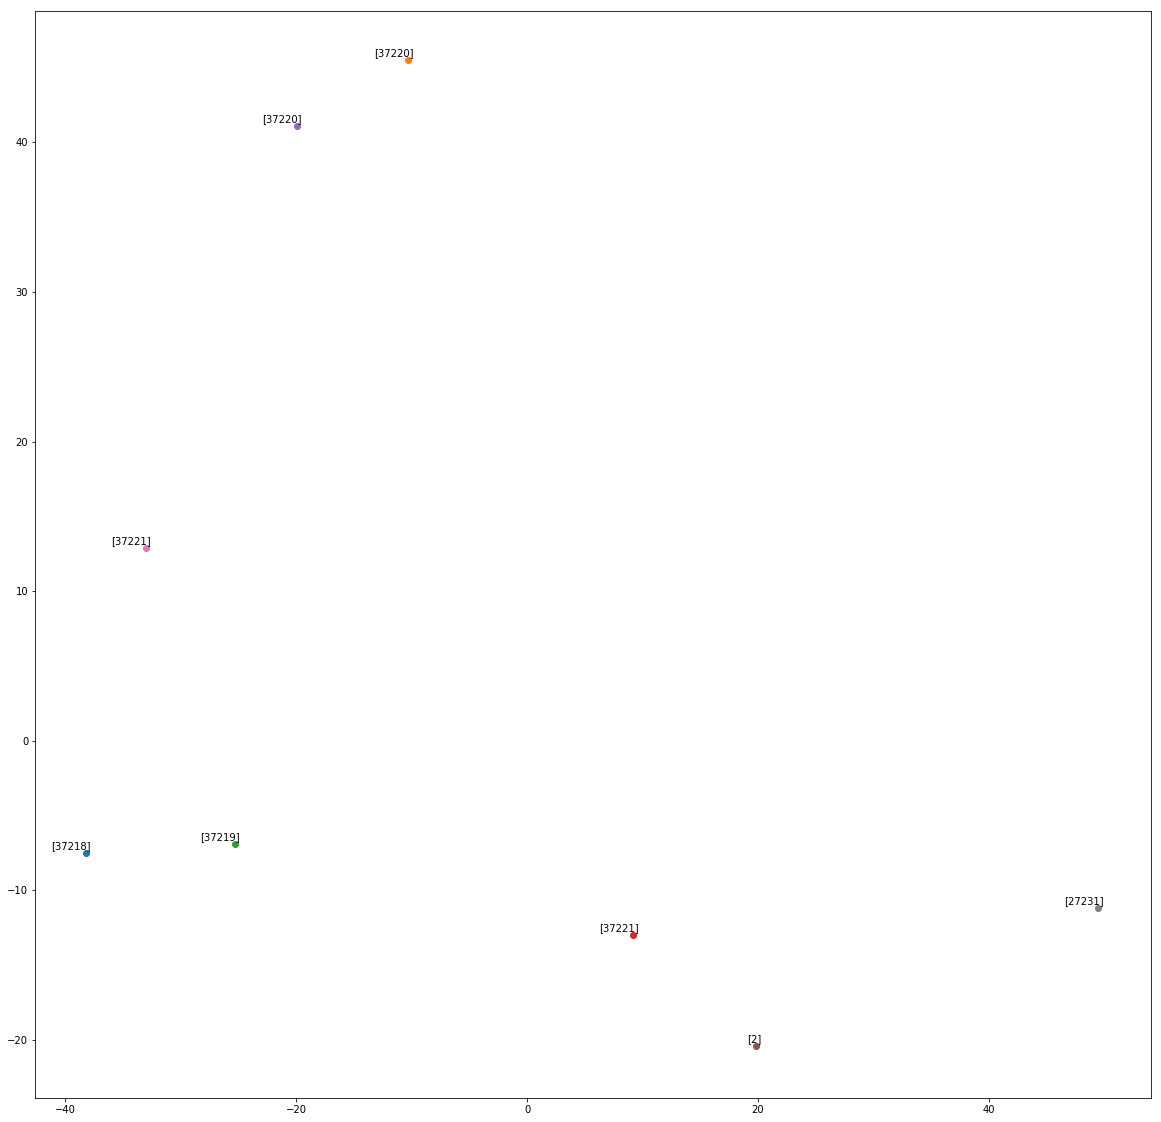

In [50]:
#100 steps
plot_with_labels(low_dim_embs, labels, os.path.join(os.getcwd(), str(filename+"_AdamOptimizer.png")))